In [127]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)

np.random.seed(0)

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import os

os.environ['CUDNN_DETERMINISTIC'] = '1'
os.environ['CUDNN_BENCHMARK'] = '0'

In [128]:
N = 100
X = np.random.rand(N)
y = np.random.randn(N) + 10 * X


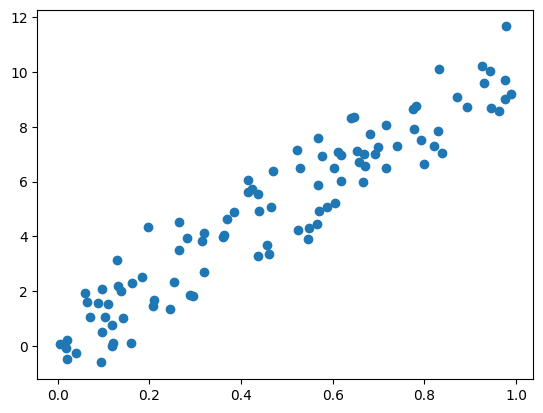

In [129]:
plt.scatter(X,y)

In [130]:
#defining the model
lin_model = nn.Linear(in_features = 1,out_features = 1)

In [131]:
#defining loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(lin_model.parameters(), lr=0.1)

In [132]:
# training
x = X.reshape(N,1)
y = y.reshape(N,1)

inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))


epoches = 500
losses = []
for i in range(epoches):
  optimizer.zero_grad()

  pred = lin_model(inputs)

  loss = criterion(pred, targets)
  losses.append(loss.item())

  loss.backward()
  optimizer.step()

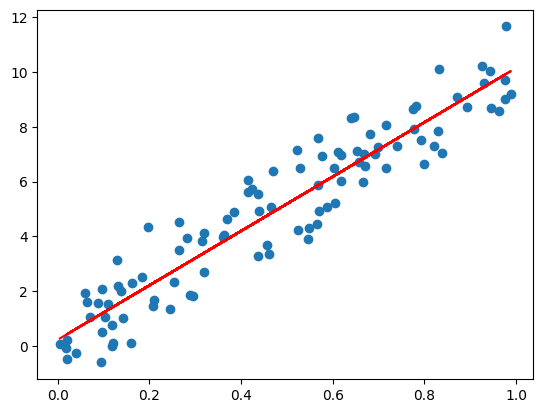

In [133]:
plt.plot(X,lin_model(inputs).detach().numpy(), color = 'r')
plt.scatter(X,y)

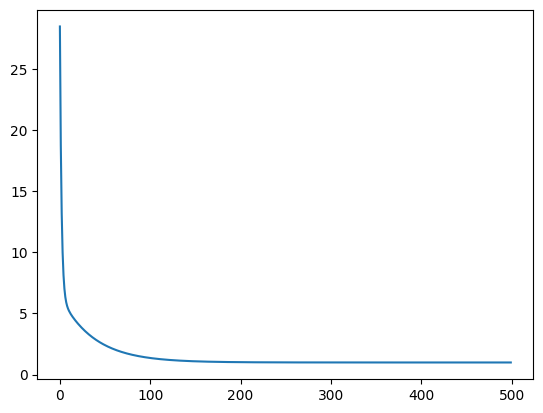

In [134]:
plt.plot(losses)